In [226]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

import pandas as pd
# import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [227]:
df=pd.read_csv('AirPassengers.csv')
# AirPassengers = pd.read_csv("AirPassengers.csv", parse_dates=[0], dayfirst=True, index_col="Month")

# x = AirPassengers
# y = np.log(AirPassengers)

df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [228]:
df.rename(columns = {'#Passengers':'passagers','Month':'date'}, inplace = True)

In [229]:
df=df.dropna()

In [230]:
df['date'] = pd.to_datetime(df['date'])

<AxesSubplot:xlabel='date'>

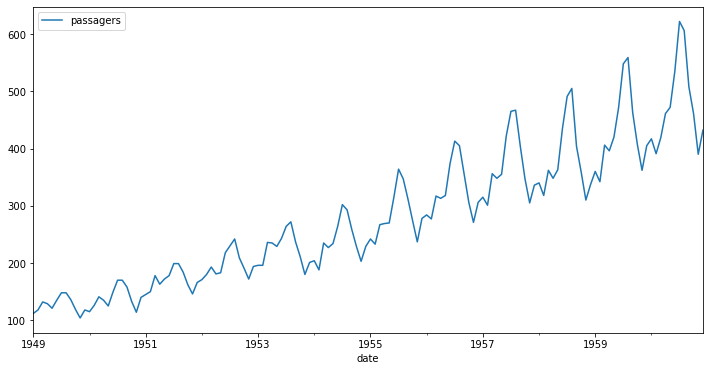

In [231]:
df.plot(x='date', y='passagers', figsize=(12,6))

In [232]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [233]:
df['x'] = [x for x in range(144)]

In [234]:
df

,date,passagers,x
0,1949-01-01,112,0
1,1949-02-01,118,1
2,1949-03-01,132,2
3,1949-04-01,129,3
4,1949-05-01,121,4
...,...,...,...
139,1960-08-01,606,139
140,1960-09-01,508,140
141,1960-10-01,461,141
142,1960-11-01,390,142


<AxesSubplot:xlabel='x'>

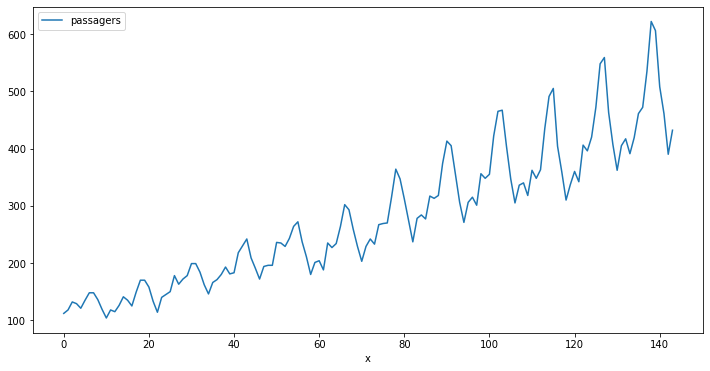

In [235]:
df.plot(x='x', y='passagers', figsize=(12,6))

In [236]:
# df = np.array(df['passagers'])

In [237]:
df1 = df.copy()

In [238]:
df1

,date,passagers,x
0,1949-01-01,112,0
1,1949-02-01,118,1
2,1949-03-01,132,2
3,1949-04-01,129,3
4,1949-05-01,121,4
...,...,...,...
139,1960-08-01,606,139
140,1960-09-01,508,140
141,1960-10-01,461,141
142,1960-11-01,390,142


In [239]:
# SimpleExp = SimpleExpSmoothing(df1) 

In [240]:
# data = SimpleExp.predict[df['x']]

In [241]:
# SimpleExpSmoothing(df1[['x','passagers']]).fit(smoothing_level=0.1)

In [242]:
data = df1['passagers'].tolist()

In [243]:
index= df1['date']
stock_data = pd.Series(data, index)
forecast_timestep = 50


In [244]:
stock_data

date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Length: 144, dtype: int64

/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


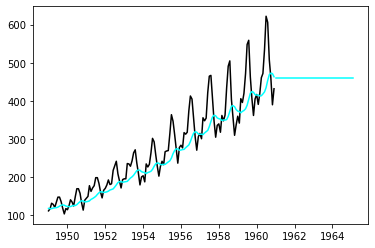

In [245]:
fit_1 = SimpleExpSmoothing(stock_data, initialization_method="heuristic").fit(smoothing_level=0.1,optimized=False)
forecast1 = fit_1.forecast(forecast_timestep).rename(r'$\alpha=0.1$')
plt.plot(stock_data, color='black')
plt.plot(fit_1.fittedvalues, color='cyan')
line1, = plt.plot(forecast1, color='cyan')

In [246]:
fit_1 = SimpleExpSmoothing(stock_data, initialization_method="heuristic").fit(smoothing_level=0.1,optimized=False) 
forecast1 = fit_1.forecast(forecast_timestep).rename(r'$\alpha=0.1$')
fit_2 = SimpleExpSmoothing(stock_data, initialization_method="heuristic").fit(smoothing_level=0.4,optimized=False) 
forecast2 = fit_2.forecast(forecast_timestep).rename(r'$\alpha=0.4$')
fit_3 = SimpleExpSmoothing(stock_data, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False) 
forecast3 = fit_3.forecast(forecast_timestep).rename(r'$\alpha=0.8$')
fit_4 = SimpleExpSmoothing(stock_data, initialization_method="estimated").fit() 
forecast4 = fit_4.forecast(forecast_timestep).rename(r'$\alpha=%s$'%fit_4.model.params['smoothing_level'])

/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [247]:
forecast_timestep = 20
fit_5 = ExponentialSmoothing(stock_data,seasonal_periods=12, trend='mul', seasonal='mul').fit() 
forecast5 = fit_5.forecast(forecast_timestep).rename(r'$\alpha=0.1$')


/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


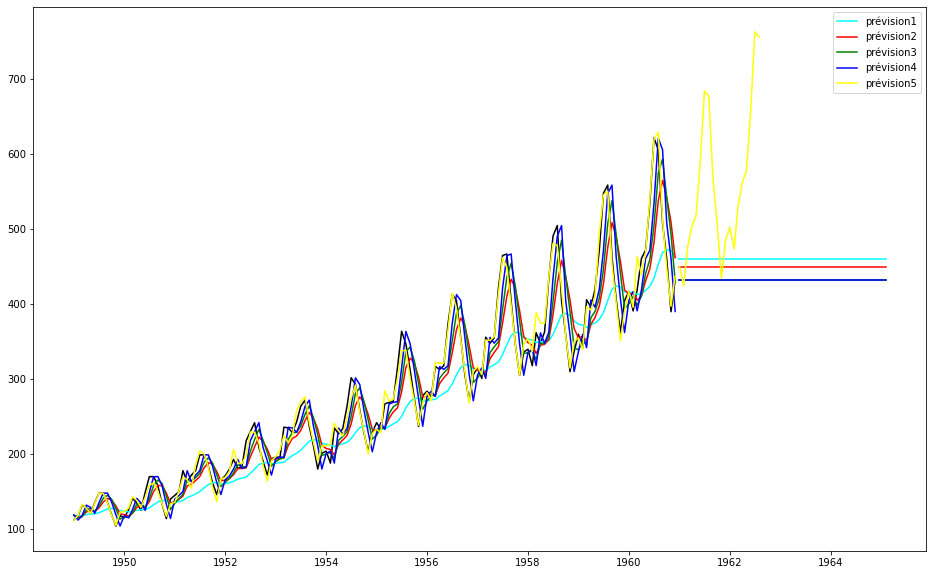

In [248]:
plt.figure(figsize=(16,10)) 
plt.plot(stock_data, color='black') 
plt.plot(fit_1.fittedvalues, color='cyan') 
line1, = plt.plot(forecast1, color='cyan') 
plt.plot(fit_2.fittedvalues, color='red') 
line2, = plt.plot(forecast2, color='red') 
plt.plot(fit_3.fittedvalues, color='green') 
line3, = plt.plot(forecast3, color='green') 
plt.plot(fit_4.fittedvalues, color='blue') 
line4, = plt.plot(forecast4, color='blue') 
plt.plot(fit_5.fittedvalues, color='yellow') 
line5, = plt.plot(forecast5, color='yellow') 
plt.legend([line1, line2, line3 ,line4,line5], ["prévision1", "prévision2", "prévision3","prévision4","prévision5"]) 
plt.show()

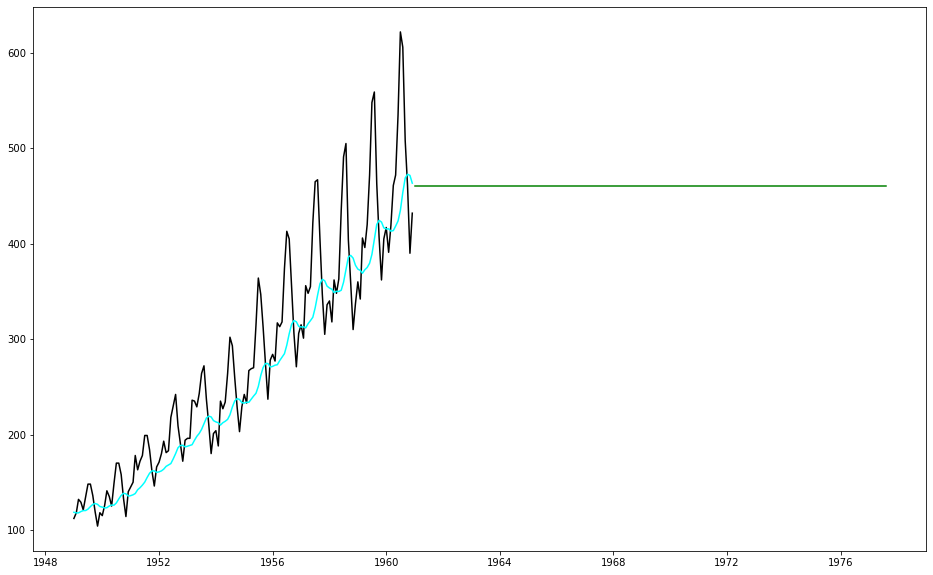

In [249]:
plt.figure(figsize=(16,10))

plt.plot(stock_data, color='black') 
plt.plot(fit_1.fittedvalues, color='cyan') 

forecast1 = fit_1.forecast(200).rename(r'$\alpha=0.1$')
plt.plot(forecast1, color='green') 

predict1 = fit_1.predict()

In [250]:
forecast1

1961-01-01    460.302774
1961-02-01    460.302774
1961-03-01    460.302774
1961-04-01    460.302774
1961-05-01    460.302774
                 ...    
1977-04-01    460.302774
1977-05-01    460.302774
1977-06-01    460.302774
1977-07-01    460.302774
1977-08-01    460.302774
Freq: MS, Name: $\alpha=0.1$, Length: 200, dtype: float64

In [251]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('L\'erreur quadratique moyenne de nos prévisions avec un niveau de lissage de {} est {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('L\'erreur quadratique moyenne de nos prévisions avec optimisation automatique est {} '.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarni

L'erreur quadratique moyenne de nos prévisions avec un niveau de lissage de 0.8 est 426.87
L'erreur quadratique moyenne de nos prévisions avec optimisation automatique est 431.69 


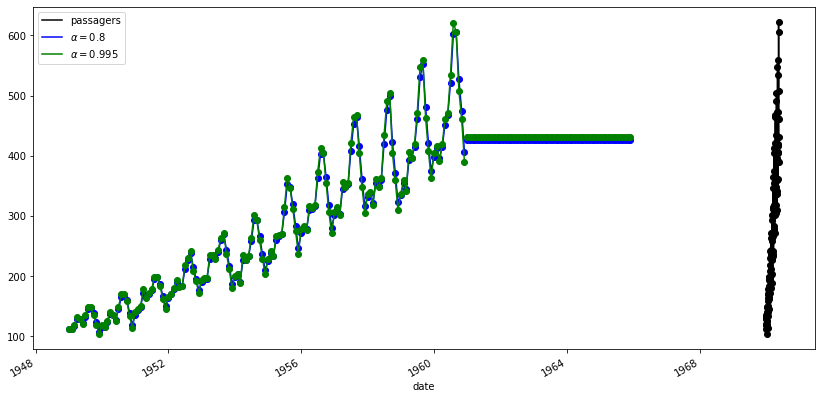

In [252]:
ses(df1['passagers'],stock_data,0.1,0.8,60)


# SARIMAX

In [253]:
df1 = df1[["date","passagers"]].set_index('date')

In [254]:
df1

,passagers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [255]:
y = np.log(df1)

In [256]:
y

,passagers
date,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [257]:
def plot_sortie_acf( y_acf, y_len, pacf=False):
    "représentation de la sortie ACF"
    if pacf:
        y_acf = y_acf[1:]
    plt.figure(figsize=(14,6))
    plt.bar(range(len(y_acf)), y_acf, width = 0.1)
    plt.xlabel('lag')
    plt.ylabel('ACF')
    plt.axhline(y=0, color='black')
    plt.axhline(y=-1.96/np.sqrt(y_len), color='b', linestyle='--', linewidth=0.8)
    plt.axhline(y=1.96/np.sqrt(y_len), color='b', linestyle='--', linewidth=0.8)
    plt.ylim(-1, 1)
    plt.show()
    return

/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


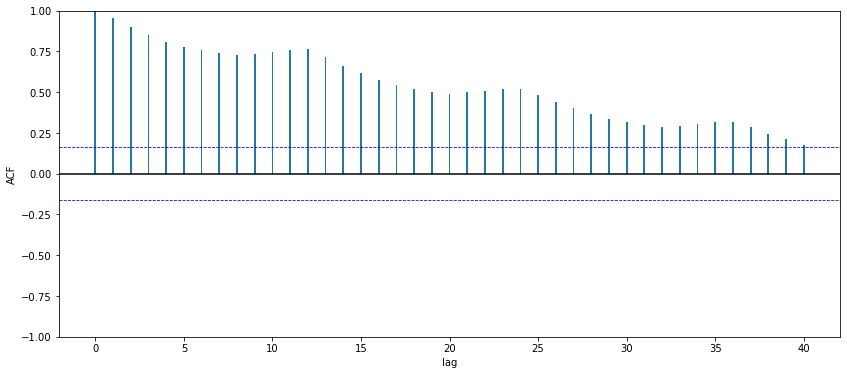

In [258]:
from statsmodels.tsa.stattools import acf, pacf
# from functions import plot_sortie_acf

y_len = len(y['passagers']) # variable nécessaire pour l'utilisation de plot_sortie_acf

plot_sortie_acf(acf(np.asarray(y['passagers'])), y_len)

In [259]:
acf(np.asarray(y['passagers']))

array([1.        , 0.95370337, 0.89891595, 0.85080249, 0.80842517,
       0.77889939, 0.75644222, 0.73760171, 0.72713135, 0.7336487 ,
       0.74425525, 0.75802665, 0.76194292, 0.71650448, 0.66304279,
       0.61836286, 0.57620873, 0.54380132, 0.51945611, 0.50070292,
       0.4904028 , 0.4981819 , 0.50616664, 0.51674339, 0.52048973,
       0.48352367, 0.43739831, 0.40040669, 0.36413092, 0.33698229,
       0.31472272, 0.29677522, 0.28861644, 0.29535468, 0.30454726,
       0.31509613, 0.31929315, 0.28621139, 0.24501605, 0.21089584,
       0.17509464])

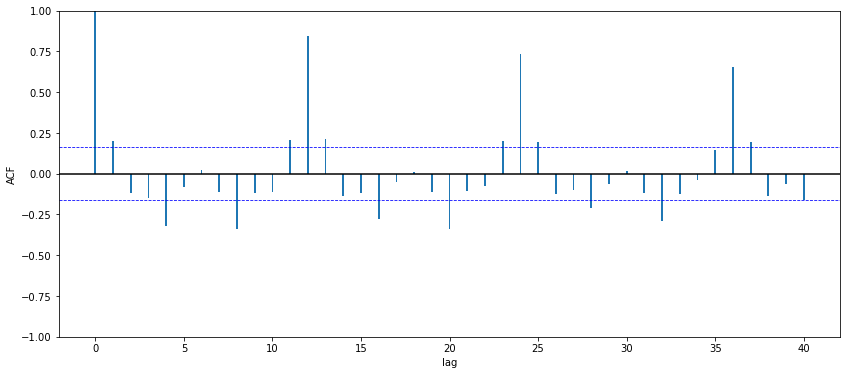

In [260]:
y_dif1 = y['passagers'] - y['passagers'].shift(1)

plot_sortie_acf(acf(np.asarray(y_dif1[1:])), y_len)

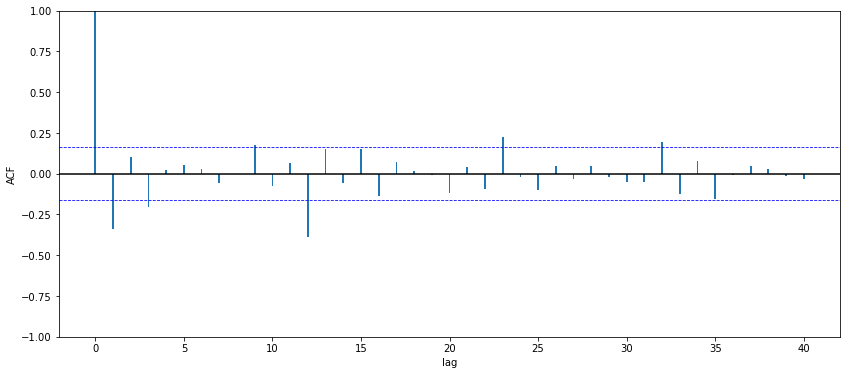

In [261]:
y_dif_1_12 = y_dif1 - y_dif1.shift(12)

plot_sortie_acf(acf(np.asarray(y_dif_1_12[13:])), y_len)

/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


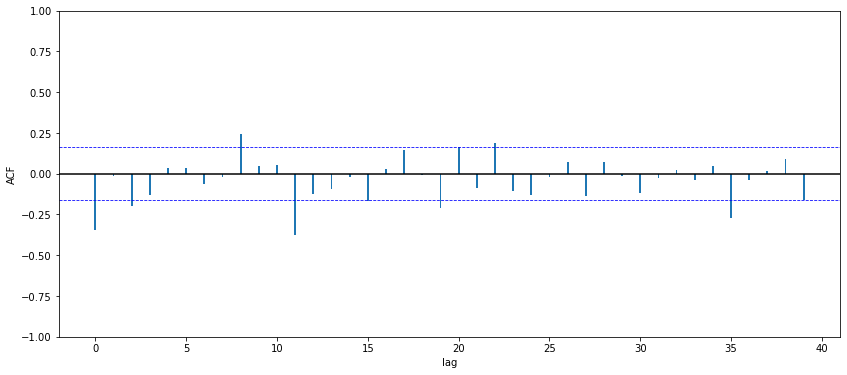

In [262]:
plot_sortie_acf(pacf(np.asarray(y_dif_1_12[13:])), y_len, pacf=True)

## modèle 1

In [263]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

In [264]:
model1 = SARIMAX(np.asarray(y['passagers']), order=(1,1,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
# print(results1.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt)[1].mean()))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66507D+00    |proj g|=  5.05756D+00

At iterate    5    f= -1.68179D+00    |proj g|=  8.84350D-01

At iterate   10    f= -1.69016D+00    |proj g|=  8.57814D-02

At iterate   15    f= -1.69027D+00    |proj g|=  3.07362D-01


 This problem is unconstrained.



At iterate   20    f= -1.69637D+00    |proj g|=  1.08110D+00

At iterate   25    f= -1.69758D+00    |proj g|=  4.48114D-02

At iterate   30    f= -1.69800D+00    |proj g|=  7.48012D-02

At iterate   35    f= -1.70153D+00    |proj g|=  7.19282D-02

At iterate   40    f= -1.70244D+00    |proj g|=  4.90492D-02

At iterate   45    f= -1.70244D+00    |proj g|=  7.53606D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     73      1     0     0   7.536D-03  -1.702D+00
  F =  -1.7024435790289150     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Retard : p-value
6 : 0.9809836705505192
12 : 0.9079


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


## Modèle 2

In [265]:
model2 = SARIMAX(np.asarray(y['passagers']), order=(1,1,1), seasonal_order=(0,1,1,12))
results2 = model2.fit()
# print(results2.summary())

# print('Retard : p-value')
# for elt in [6, 12, 18, 24, 30, 36]:
#     print('{} : {}'.format(elt, acorr_ljungbox(results2.resid, lags=elt)[1].mean()))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66723D+00    |proj g|=  5.17010D+00

At iterate    5    f= -1.68391D+00    |proj g|=  2.26115D-01

At iterate   10    f= -1.69009D+00    |proj g|=  2.48350D+00

At iterate   15    f= -1.69339D+00    |proj g|=  2.10127D-01


 This problem is unconstrained.



At iterate   20    f= -1.69425D+00    |proj g|=  2.06206D-02

At iterate   25    f= -1.69830D+00    |proj g|=  1.62549D+00

At iterate   30    f= -1.70101D+00    |proj g|=  3.11726D-03

At iterate   35    f= -1.70102D+00    |proj g|=  2.26026D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     57      1     0     0   3.875D-03  -1.701D+00
  F =  -1.7010170986514370     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


## Modèle 3

In [266]:
model3 = SARIMAX(np.asarray(y['passagers']), order=(0,1,1), seasonal_order=(0,1,1,12))
results3 = model3.fit()
# print(results3.summary())

# print('Retard : p-value')
# for elt in [6, 12, 18, 24, 30, 36]:
#     print('{} : {}'.format(elt, acorr_ljungbox(results3.resid, lags=elt)[1].mean()))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66903D+00    |proj g|=  5.46243D+00

At iterate    5    f= -1.68810D+00    |proj g|=  1.88599D-01

At iterate   10    f= -1.69376D+00    |proj g|=  2.88185D+00

At iterate   15    f= -1.69921D+00    |proj g|=  1.05906D-02

At iterate   20    f= -1.69928D+00    |proj g|=  1.86748D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     37      1     0     0   5.151D-03  -1.699D+00
  F =  -1.6992811048695728     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


Les tests de significativité des paramètres et de blancheur du résidu sont validés au niveau 5%.

In [267]:
from scipy.stats import shapiro

shapiro(results3.resid)

ShapiroResult(statistic=0.16899025440216064, pvalue=5.187330896870241e-25)

Le test de normalité est également validé pour ce modèle.

## Prévision 

In [268]:
df1['passagers']

date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: passagers, Length: 144, dtype: int64

In [290]:
pred_model3 = results3.get_forecast(24)

In [291]:
pred_model3.conf_int(alpha=0.05)

array([[6.03822685, 6.1821451 ],
       [5.96993607, 6.13763359],
       [6.07749619, 6.26599673],
       [6.09568625, 6.30291185],
       [6.12035417, 6.34474767],
       [6.24861275, 6.48895093],
       [6.37964001, 6.63492894],
       [6.36819693, 6.6376082 ],
       [6.1832906 , 6.46611993],
       [6.06118523, 6.35682424],
       [5.90953507, 6.21745132],
       [6.00817355, 6.32789596],
       [6.02990281, 6.38298078],
       [5.96289848, 6.33718281],
       [6.0708263 , 6.46517826],
       [6.08883152, 6.50227822],
       [6.1129579 , 6.54465557],
       [6.2404338 , 6.68964153],
       [6.37051009, 6.83657049],
       [6.35799609, 6.84032067],
       [6.17193212, 6.66999005],
       [6.04860592, 6.5619152 ],
       [5.89568883, 6.4238092 ],
       [5.99302694, 6.5355542 ]])

In [287]:
np.exp(pred_model3.conf_int(alpha=0.05))

array([[419.14915924, 484.02913655],
       [391.48064069, 462.95672927],
       [435.93632348, 526.36597039],
       [443.93859153, 546.15993297],
       [455.02582039, 569.49367349],
       [517.29471059, 657.83289129],
       [589.71537639, 761.22496874],
       [583.00567815, 763.26722269],
       [484.58390909, 642.98405744],
       [428.88346299, 576.412899  ],
       [368.53477295, 501.42363536],
       [406.73975312, 559.97713645]])

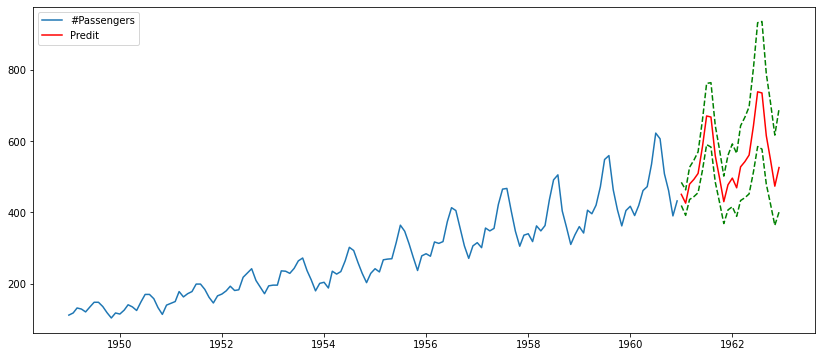

In [294]:
pred_model3 = results3.get_forecast(24)
pred = np.exp(pred_model3.predicted_mean)
pred_l = [np.exp(elt[0]) for elt in pred_model3.conf_int(alpha=0.05)]
pred_u = [np.exp(elt[1]) for elt in pred_model3.conf_int(alpha=0.05)]

plt.figure(figsize=(14,6))
plt.plot(df1['passagers'], label='#Passengers')
plt.plot(pd.date_range(x.index[len(x)-1], periods=24, freq='M'), pred, color='r', label='Predit')
plt.plot(pd.date_range(x.index[len(x)-1], periods=24, freq='M'), pred_l, color='g', linestyle='--')
plt.plot(pd.date_range(x.index[len(x)-1], periods=24, freq='M'), pred_u, color='g', linestyle='--')
plt.legend()
plt.show()

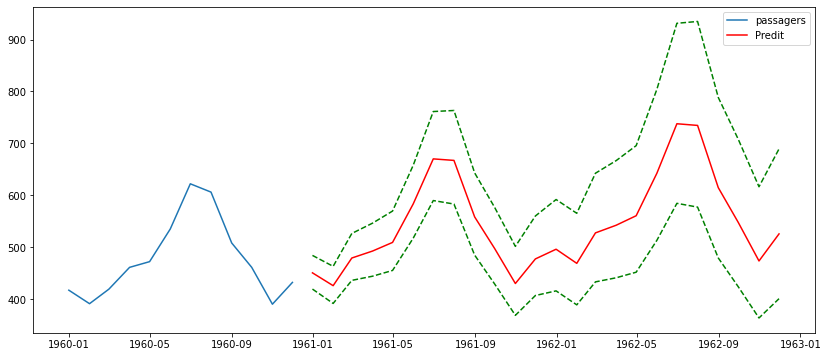

In [296]:
plt.figure(figsize=(14,6))
plt.plot(df1['passagers']['1960':], label='passagers')
plt.plot(pd.date_range(df1.index[len(x)-1], periods=24, freq='M'), pred, color='r', label='Predit')
plt.plot(pd.date_range(df1.index[len(x)-1], periods=24, freq='M'), pred_l, color='g', linestyle='--')
plt.plot(pd.date_range(df1.index[len(x)-1], periods=24, freq='M'), pred_u, color='g', linestyle='--')
plt.legend()
plt.show()

## Analyse a posteriori

In [273]:
x_tronc = df1[:'1959']
y_tronc = np.log(x_tronc)
x_a_prevoir = df1['1960':]

In [274]:
model3tronc = SARIMAX(np.asarray(y_tronc['passagers']), order=(0,1,1), seasonal_order=(0,1,1,12))
results3tronc = model3tronc.fit()
# print(results3tronc.summary())

# print('Retard : p-value')
# for elt in [6, 12, 18, 24, 30, 36]:
#     print('{} : {}'.format(elt, acorr_ljungbox(results3tronc.resid, lags=elt)[1].mean()))
    
# shapiro(results3tronc.resid)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66240D+00    |proj g|=  5.61791D+00

At iterate    5    f= -1.68263D+00    |proj g|=  1.43291D-01

At iterate   10    f= -1.68730D+00    |proj g|=  2.83023D+00

At iterate   15    f= -1.69402D+00    |proj g|=  1.13292D-02

At iterate   20    f= -1.69414D+00    |proj g|=  1.05794D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     41      1     0     0   1.138D-03  -1.694D+00
  F =  -1.6941408152775905     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Retard : p-value
6 : 0.9828439762529877
12 : 0.9095710052471232
18 : 0.6314041885592574
24 : 0.5477476223566117
30 : 0.5610395940901288
36 : 0.6101837717262047


/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.1749112606048584, pvalue=5.4857261131324326e-24)

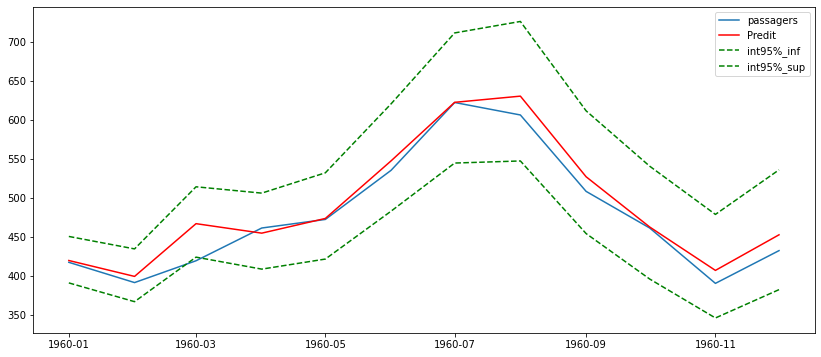

In [297]:
pred_model3tronc = results3tronc.get_forecast(12)
pred_tronc = np.exp(pred_model3tronc.predicted_mean)
pred_l_tronc = [np.exp(elt[0]) for elt in pred_model3tronc.conf_int(alpha=0.05)]
pred_u_tronc = [np.exp(elt[1]) for elt in pred_model3tronc.conf_int(alpha=0.05)]

plt.figure(figsize=(14,6))
plt.plot(x_a_prevoir, label='passagers')
plt.plot(x_a_prevoir.index, pred_tronc, color='r', label='Predit')
plt.plot(x_a_prevoir.index, pred_l_tronc, color='g', linestyle='--', label='int95%_inf')
plt.plot(x_a_prevoir.index, pred_u_tronc, color='g', linestyle='--', label='int95%_sup')
plt.legend()
plt.show()

On calcule les RMSE et MAPE.

In [276]:
rmse = np.sqrt(((x_a_prevoir['passagers']-pred_tronc)**2).mean())
rmse

18.595396265809214

In [278]:
mape=(np.abs(1-pred_tronc/x_a_prevoir['passagers'])).mean()*100
mape

2.9049901076488323

# sarima